In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('water.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [5]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

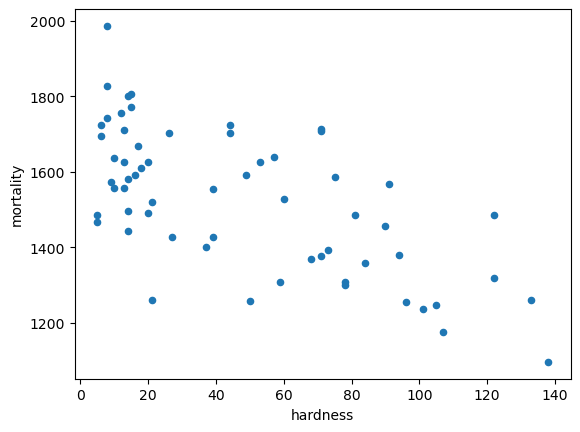

In [52]:
df.plot(kind = "scatter", y = 'mortality', x = 'hardness')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

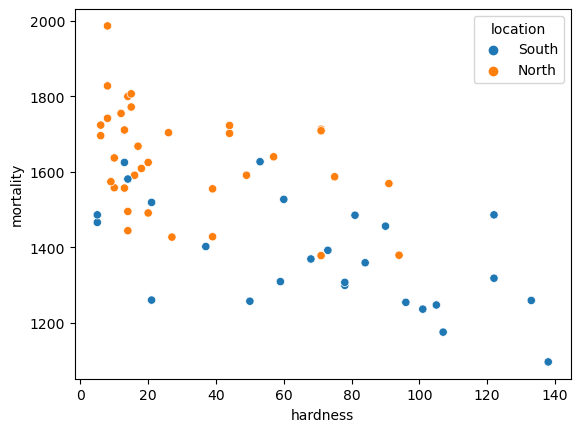

In [53]:
sns.scatterplot(data=df, y='mortality', x='hardness', hue = 'location')

Из этого графика видно, то кроме рассматриваемых переменных немаловажен третий фактор - регион

In [10]:
df.corr(method = "pearson")

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [11]:
df.corr(method= "spearman")

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [93]:
X = df[['hardness']]
y = df['mortality']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
model.intercept_

1667.3814435059633

In [96]:
model.coef_

array([-3.13606489])

#### Получена модель y = 1667.38 - 3.136*x
Рассчитаем кофэффициент детерминации и построим график

In [97]:
model.score(X_test, y_test)

0.5024327259599013

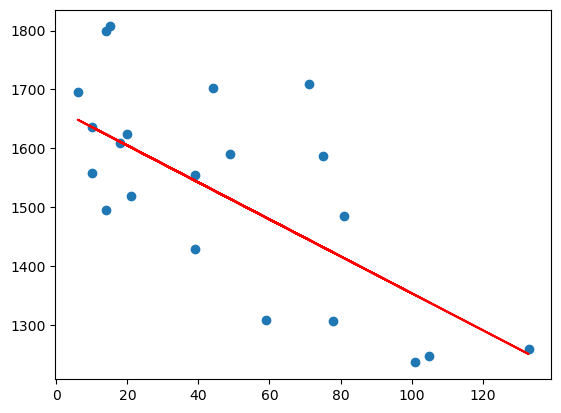

In [98]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

#### Аналитический рассчёт коэффициента детерминации

In [99]:
SSres = sum((y_test - y_pred)**2)
SStot = sum((y_test - y.mean())**2)
R2 = 1 - SSres/SStot
R2

0.5033273605903335

#### Строим график остатков

In [82]:
y_ost = y - model.predict(X)

Text(0, 0.5, 'Остатки')

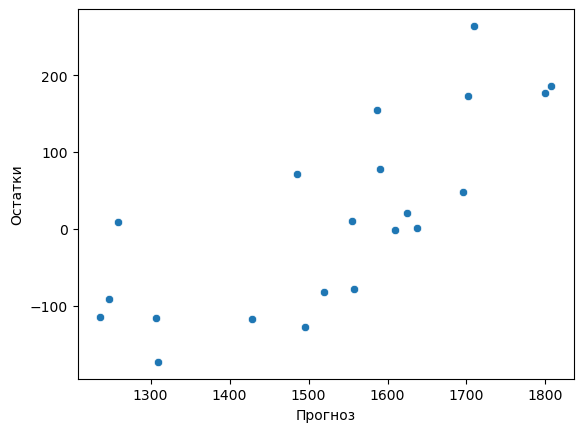

In [83]:
sns.scatterplot(x = y_test, y =y_ost)
plt.xlabel("Прогноз")
plt.ylabel("Остатки")

<AxesSubplot:xlabel='mortality', ylabel='Count'>

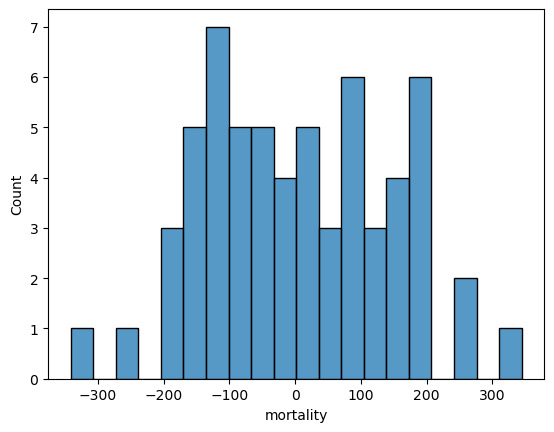

In [84]:
sns.histplot(y_ost, bins = 20)

Разброс остатков болшой, распределение не похоже на нормальное. Вывод - данная модель не очень хорошо описывает закономерность

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [57]:
df1 = df[df.location == 'South']
df2 = df[df.location == 'North']

X1 = df1[['hardness']]
y1 = df1['mortality']
X2 = df2[['hardness']]
y2 = df2['mortality']

In [58]:
df1.corr("pearson")

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [59]:
df1.corr("spearman")

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [60]:
df2.corr("pearson")

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [61]:
df2.corr("spearman")

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Text(0.5, 1.0, 'Юг')

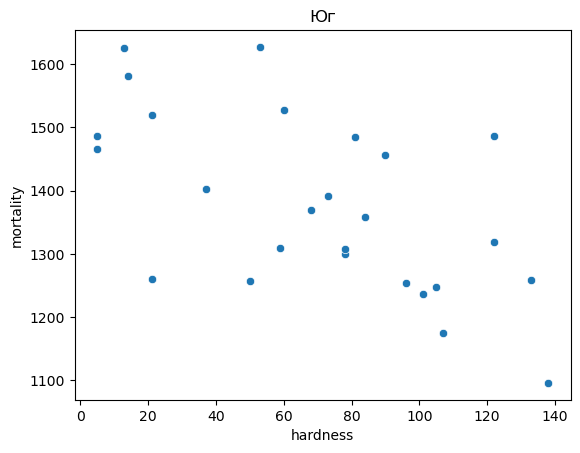

In [66]:
sns.scatterplot(data = df1, x = 'hardness', y = 'mortality')
plt.title("Юг")

Text(0.5, 1.0, 'Север')

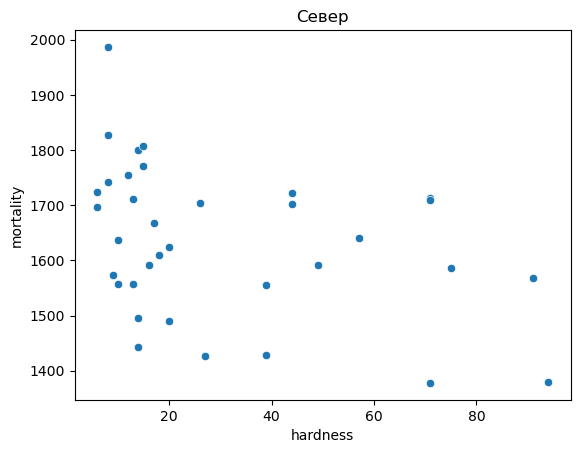

In [67]:
sns.scatterplot(data = df2, x = 'hardness', y = 'mortality')
plt.title("Север")

### Модель для южного региона

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.33, random_state = 42)
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [124]:
model1.intercept_

1616.1200950622008

In [125]:
model1.coef_

array([-3.32921527])

In [126]:
model1.score(X_test, y_test)

-0.9929121569920696

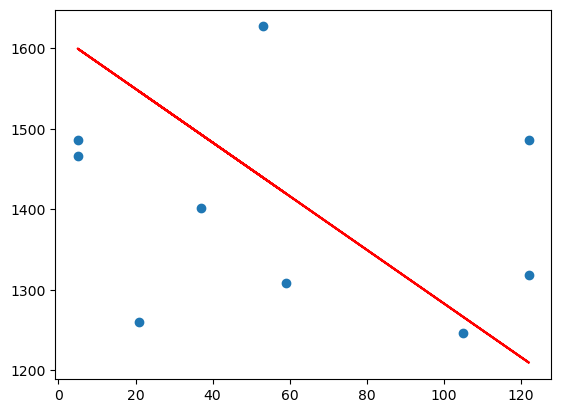

In [128]:
y_pred  = model1.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [129]:
SSres = sum((y_test - y_pred)**2)
SStot = sum((y_test - y1.mean())**2)
R2 = 1 - SSres/SStot
R2

-0.9199964782480281

Text(0, 0.5, 'Остатки')

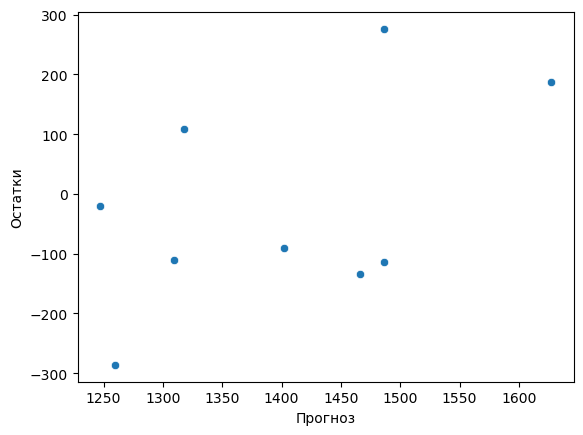

In [130]:
y_ost = y1 - model1.predict(X1)
sns.scatterplot(x = y_test, y =y_ost)
plt.xlabel("Прогноз")
plt.ylabel("Остатки")

<AxesSubplot:xlabel='mortality', ylabel='Count'>

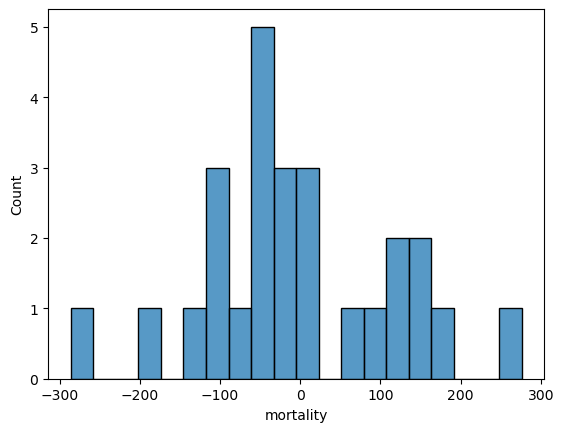

In [131]:
sns.histplot(y_ost, bins = 20)

### Модель для северного региона

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.33, random_state = 42)
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [134]:
model2.intercept_

1689.7784976331984

In [135]:
model2.coef_

array([-1.9947167])

In [136]:
model2.score(X_test, y_test)

0.021563363042132577

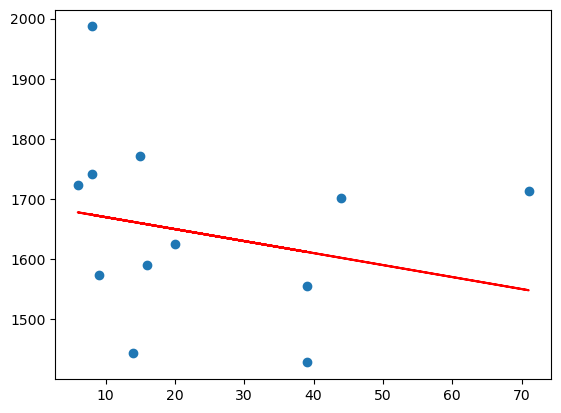

In [137]:
y_pred  = model2.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [138]:
SSres = sum((y_test - y_pred)**2)
SStot = sum((y_test - y2.mean())**2)
R2 = 1 - SSres/SStot
R2

0.0413983956726065

Text(0, 0.5, 'Остатки')

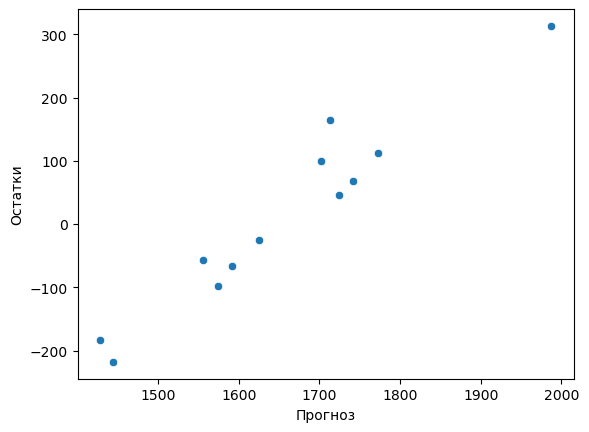

In [140]:
y_ost = y2 - model2.predict(X2)
sns.scatterplot(x = y_test, y =y_ost)
plt.xlabel("Прогноз")
plt.ylabel("Остатки")

<AxesSubplot:xlabel='mortality', ylabel='Count'>

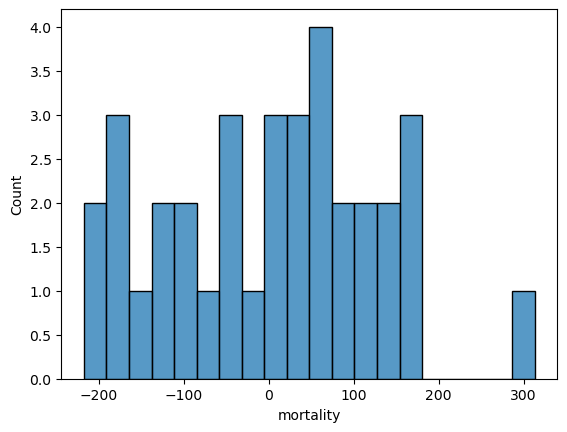

In [141]:
sns.histplot(y_ost, bins = 20)

In [ ]:
Вывод: регрессия хорошо описывает зависимость для южного региона и плохо для северного.